## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman1Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.1
bias = 0.1


## Dataset 


In [5]:
#Parameters 
n_features = 5
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman1Dataset.friedman1_data(n_samples,n_features)

         X0        X1        X2        X3        X4         Y
0  1.404614 -1.295897 -0.448448  0.270975  0.650327 -0.252166
1 -1.076009 -0.647020 -1.615628 -0.266329  1.490370  0.090480
2 -0.702849 -0.146214  1.465345  1.115779  0.565789  1.073721
3  0.992829 -1.372252 -1.612967  0.365923  0.971853  0.529343
4  0.314068 -1.126468  1.031521 -0.064456 -0.087660 -0.307569


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 1.0170495	total: 69.5ms	remaining: 1m 9s
1:	learn: 1.0071913	total: 70.1ms	remaining: 35s
2:	learn: 0.9975398	total: 70.7ms	remaining: 23.5s
3:	learn: 0.9874499	total: 71.2ms	remaining: 17.7s
4:	learn: 0.9783151	total: 71.7ms	remaining: 14.3s
5:	learn: 0.9677527	total: 72.3ms	remaining: 12s
6:	learn: 0.9564570	total: 72.8ms	remaining: 10.3s
7:	learn: 0.9473625	total: 73.5ms	remaining: 9.11s
8:	learn: 0.9388358	total: 74ms	remaining: 8.15s
9:	learn: 0.9293401	total: 74.5ms	remaining: 7.38s
10:	learn: 0.9204743	total: 75ms	remaining: 6.74s
11:	learn: 0.9104483	total: 75.5ms	remaining: 6.21s
12:	learn: 0.9018445	total: 76.1ms	remaining: 5.78s
13:	learn: 0.8925760	total: 76.7ms	remaining: 5.4s
14:	learn: 0.8845761	total: 77.2ms	remaining: 5.07s
15:	learn: 0.8770785	total: 77.9ms	remaining: 4.79s
16:	learn: 0.8688713	total: 78.3ms	remaining: 4.53s
17:	learn: 0.8607482	total: 78.8ms	remaining: 4.3s
18:	learn: 0.8529347	total: 79.3ms	remaining: 4.09s
19

84:	learn: 0.4903837	total: 109ms	remaining: 1.17s
85:	learn: 0.4866485	total: 109ms	remaining: 1.16s
86:	learn: 0.4827078	total: 109ms	remaining: 1.15s
87:	learn: 0.4797012	total: 110ms	remaining: 1.14s
88:	learn: 0.4763093	total: 110ms	remaining: 1.13s
89:	learn: 0.4734138	total: 111ms	remaining: 1.12s
90:	learn: 0.4697685	total: 111ms	remaining: 1.11s
91:	learn: 0.4660621	total: 111ms	remaining: 1.1s
92:	learn: 0.4629746	total: 112ms	remaining: 1.09s
93:	learn: 0.4599897	total: 112ms	remaining: 1.08s
94:	learn: 0.4559438	total: 112ms	remaining: 1.07s
95:	learn: 0.4535403	total: 113ms	remaining: 1.06s
96:	learn: 0.4506045	total: 113ms	remaining: 1.05s
97:	learn: 0.4473797	total: 114ms	remaining: 1.05s
98:	learn: 0.4434035	total: 114ms	remaining: 1.04s
99:	learn: 0.4408160	total: 115ms	remaining: 1.03s
100:	learn: 0.4380201	total: 115ms	remaining: 1.02s
101:	learn: 0.4347657	total: 115ms	remaining: 1.01s
102:	learn: 0.4316114	total: 116ms	remaining: 1.01s
103:	learn: 0.4277005	total: 

256:	learn: 0.1504040	total: 187ms	remaining: 541ms
257:	learn: 0.1494964	total: 188ms	remaining: 539ms
258:	learn: 0.1484239	total: 188ms	remaining: 538ms
259:	learn: 0.1472838	total: 188ms	remaining: 536ms
260:	learn: 0.1461166	total: 189ms	remaining: 534ms
261:	learn: 0.1450124	total: 189ms	remaining: 533ms
262:	learn: 0.1439691	total: 190ms	remaining: 532ms
263:	learn: 0.1429496	total: 190ms	remaining: 530ms
264:	learn: 0.1419782	total: 191ms	remaining: 529ms
265:	learn: 0.1410723	total: 191ms	remaining: 528ms
266:	learn: 0.1402720	total: 192ms	remaining: 526ms
267:	learn: 0.1397646	total: 192ms	remaining: 525ms
268:	learn: 0.1388505	total: 192ms	remaining: 523ms
269:	learn: 0.1379330	total: 193ms	remaining: 521ms
270:	learn: 0.1367948	total: 193ms	remaining: 520ms
271:	learn: 0.1359250	total: 194ms	remaining: 519ms
272:	learn: 0.1350222	total: 194ms	remaining: 517ms
273:	learn: 0.1339524	total: 195ms	remaining: 516ms
274:	learn: 0.1329607	total: 195ms	remaining: 515ms
275:	learn: 

466:	learn: 0.0400354	total: 291ms	remaining: 333ms
467:	learn: 0.0398700	total: 292ms	remaining: 332ms
468:	learn: 0.0396330	total: 293ms	remaining: 332ms
469:	learn: 0.0393998	total: 294ms	remaining: 331ms
470:	learn: 0.0391047	total: 294ms	remaining: 331ms
471:	learn: 0.0388779	total: 295ms	remaining: 330ms
472:	learn: 0.0387193	total: 295ms	remaining: 329ms
473:	learn: 0.0384966	total: 296ms	remaining: 328ms
474:	learn: 0.0382775	total: 296ms	remaining: 327ms
475:	learn: 0.0380402	total: 297ms	remaining: 327ms
476:	learn: 0.0377937	total: 297ms	remaining: 326ms
477:	learn: 0.0375508	total: 298ms	remaining: 325ms
478:	learn: 0.0373114	total: 298ms	remaining: 324ms
479:	learn: 0.0371628	total: 299ms	remaining: 324ms
480:	learn: 0.0369354	total: 299ms	remaining: 323ms
481:	learn: 0.0367869	total: 300ms	remaining: 322ms
482:	learn: 0.0366438	total: 300ms	remaining: 322ms
483:	learn: 0.0365040	total: 301ms	remaining: 321ms
484:	learn: 0.0362824	total: 301ms	remaining: 320ms
485:	learn: 

628:	learn: 0.0219614	total: 371ms	remaining: 219ms
629:	learn: 0.0218303	total: 372ms	remaining: 218ms
630:	learn: 0.0217214	total: 372ms	remaining: 218ms
631:	learn: 0.0216976	total: 373ms	remaining: 217ms
632:	learn: 0.0215937	total: 374ms	remaining: 217ms
633:	learn: 0.0214682	total: 374ms	remaining: 216ms
634:	learn: 0.0214457	total: 375ms	remaining: 215ms
635:	learn: 0.0212634	total: 375ms	remaining: 215ms
636:	learn: 0.0210850	total: 376ms	remaining: 214ms
637:	learn: 0.0209723	total: 376ms	remaining: 213ms
638:	learn: 0.0209241	total: 376ms	remaining: 213ms
639:	learn: 0.0208296	total: 377ms	remaining: 212ms
640:	learn: 0.0207202	total: 377ms	remaining: 211ms
641:	learn: 0.0206131	total: 378ms	remaining: 211ms
642:	learn: 0.0204995	total: 378ms	remaining: 210ms
643:	learn: 0.0203954	total: 379ms	remaining: 209ms
644:	learn: 0.0203494	total: 379ms	remaining: 209ms
645:	learn: 0.0202386	total: 379ms	remaining: 208ms
646:	learn: 0.0201400	total: 380ms	remaining: 207ms
647:	learn: 

844:	learn: 0.0099943	total: 475ms	remaining: 87.2ms
845:	learn: 0.0099481	total: 476ms	remaining: 86.6ms
846:	learn: 0.0099393	total: 476ms	remaining: 86ms
847:	learn: 0.0098899	total: 477ms	remaining: 85.5ms
848:	learn: 0.0098454	total: 477ms	remaining: 84.9ms
849:	learn: 0.0097937	total: 478ms	remaining: 84.3ms
850:	learn: 0.0097459	total: 478ms	remaining: 83.7ms
851:	learn: 0.0097242	total: 478ms	remaining: 83.1ms
852:	learn: 0.0096802	total: 479ms	remaining: 82.5ms
853:	learn: 0.0096363	total: 479ms	remaining: 81.9ms
854:	learn: 0.0095931	total: 480ms	remaining: 81.4ms
855:	learn: 0.0095504	total: 480ms	remaining: 80.8ms
856:	learn: 0.0095045	total: 481ms	remaining: 80.2ms
857:	learn: 0.0094625	total: 481ms	remaining: 79.6ms
858:	learn: 0.0094209	total: 481ms	remaining: 79ms
859:	learn: 0.0093958	total: 482ms	remaining: 78.4ms
860:	learn: 0.0093552	total: 482ms	remaining: 77.9ms
861:	learn: 0.0093293	total: 483ms	remaining: 77.3ms
862:	learn: 0.0093221	total: 483ms	remaining: 76.7

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

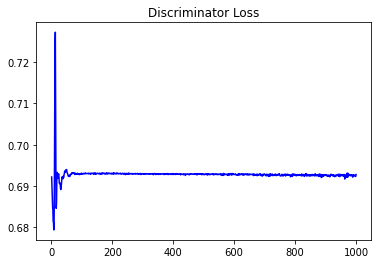

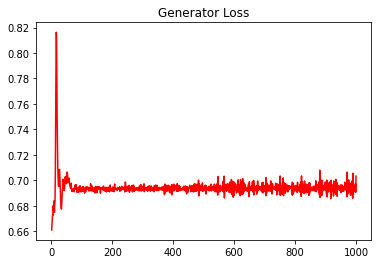

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.10815867077254247


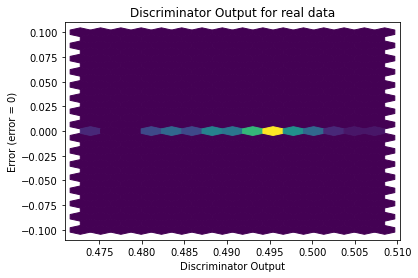

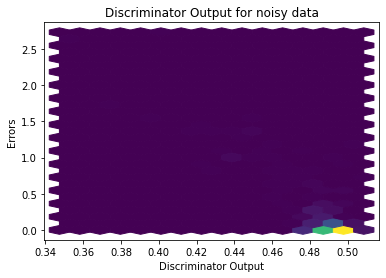

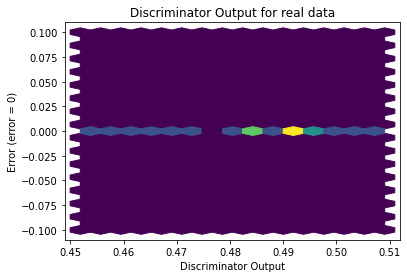

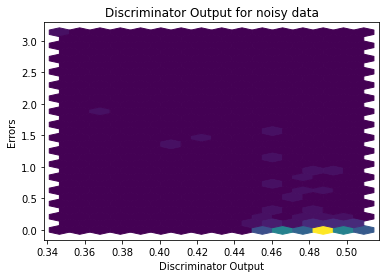

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


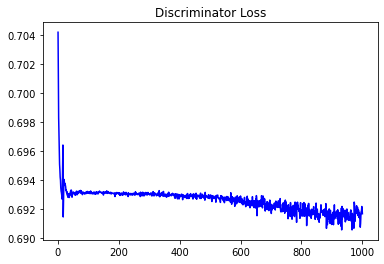

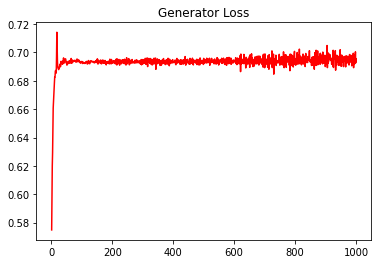

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.06972296745123946


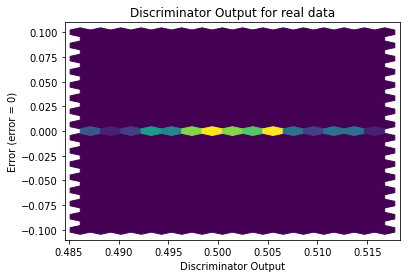

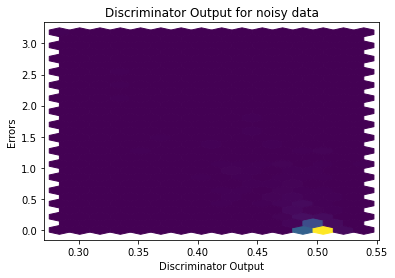

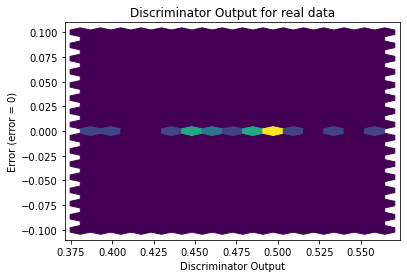

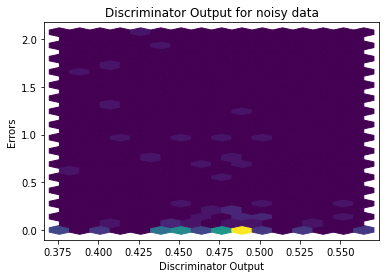

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.0885]], requires_grad=True)
